## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

The data is taken from kaggle
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. FEATURES AND LABEL
We can explore about meaning of each feature from metadata file.
Heart_Disease_Project/metadata


## PREPARING TOOLS

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
import sklearn

## EXPLORATORY DATA ANALYSIS

In [4]:
df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


>"Inference 1: There are no null values and all are numeric columns so, we don't need to take care of preprocessing."

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.shape

(303, 14)

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
plt.plot()

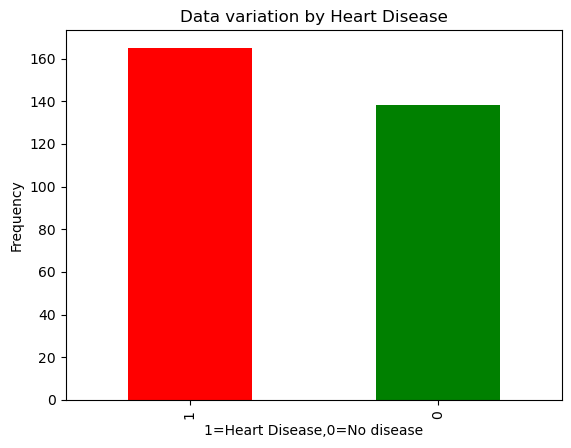

In [26]:
def show_data(col,kind,xlabel,title):
    df[col].value_counts().plot(kind=kind,color=["Red","Green"]);
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()
show_data("target","bar","1=Heart Disease,0=No disease","Data variation by Heart Disease")


>Inference 2: Data is almost balanced because there are almost equal number of people with heart disease and not heart disease

In [44]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [45]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


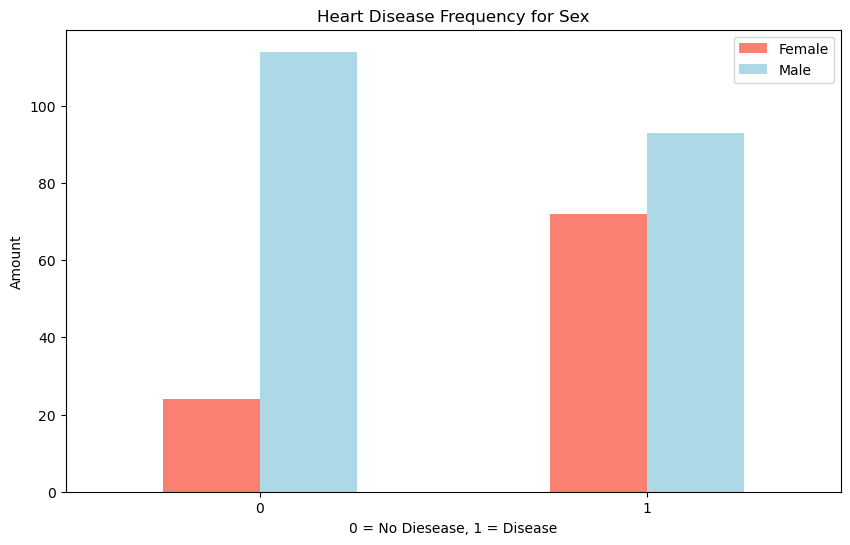

In [46]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs Heart Rate for Heart Disease

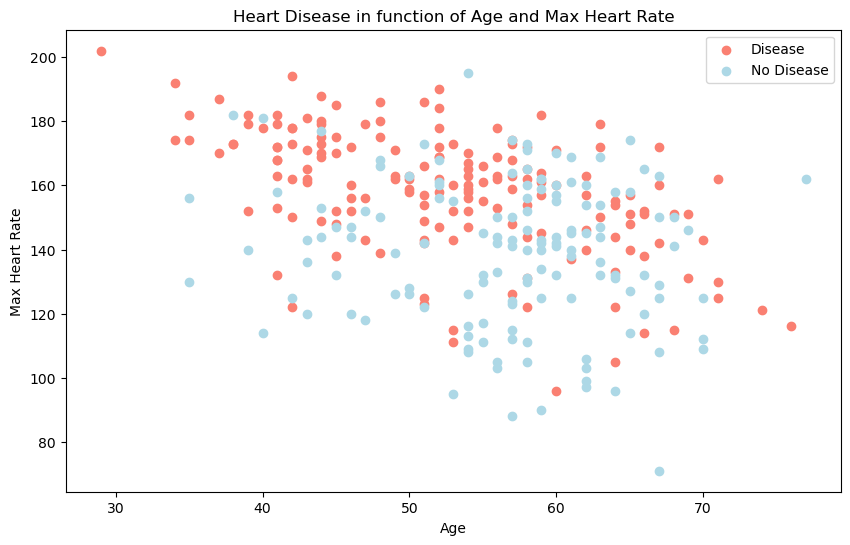

In [47]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

> Inference 3: Person with disease have ususally high heart rate and there are few outliers which shows some people with disease having low heart rate

In [107]:
df1=df.copy()

In [108]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [109]:
cols=df1[df1["target"]==1]
cols=df2[df2["thalach"]<120]

In [116]:
cols

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


In [119]:
## Removing columns with heart disease but low heart rate
df1.drop([17,48,95,105,136,139,144],axis="index",inplace=True)

In [120]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [121]:
df2=df1.copy()

## Check the features for correlation to check if we can reduce dimensionality

In [123]:
df2.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.075596,-0.092109,0.283237,0.233476,0.128421,-0.149357,-0.382881,0.108707,0.211203,-0.154775,0.295741,0.076508,-0.252921
sex,-0.075596,1.000000,-0.016448,-0.059061,-0.222879,0.052009,-0.047199,-0.081943,0.121995,0.102476,-0.040807,0.104287,0.185597,-0.270427
cp,-0.092109,-0.016448,1.000000,0.046397,-0.064124,0.093349,0.033815,0.335390,-0.381868,-0.162427,0.137763,-0.171826,-0.140070,0.432338
trestbps,0.283237,-0.059061,0.046397,1.000000,0.123594,0.187130,-0.123266,-0.048430,0.066791,0.190410,-0.115826,0.103970,0.060630,-0.148218
chol,0.233476,-0.222879,-0.064124,0.123594,1.000000,0.020382,-0.147733,-0.035278,0.059310,0.051404,-0.002499,0.060571,0.089170,-0.074101
fbs,0.128421,0.052009,0.093349,0.187130,0.020382,1.000000,-0.092172,-0.003587,0.031989,0.012070,-0.072668,0.141390,-0.033589,-0.028298
restecg,-0.149357,-0.047199,0.033815,-0.123266,-0.147733,-0.092172,1.000000,0.063473,-0.066440,-0.064992,0.113433,-0.070927,-0.018941,0.133838
thalach,-0.382881,-0.081943,0.335390,-0.048430,-0.035278,-0.003587,0.063473,1.000000,-0.399836,-0.372965,0.403024,-0.246104,-0.122028,0.481251
exang,0.108707,0.121995,-0.381868,0.066791,0.059310,0.031989,-0.066440,-0.399836,1.000000,0.301605,-0.270101,0.111420,0.190400,-0.444056
oldpeak,0.211203,0.102476,-0.162427,0.190410,0.051404,0.012070,-0.064992,-0.372965,0.301605,1.000000,-0.572834,0.224132,0.214656,-0.433499


(14.5, -0.5)

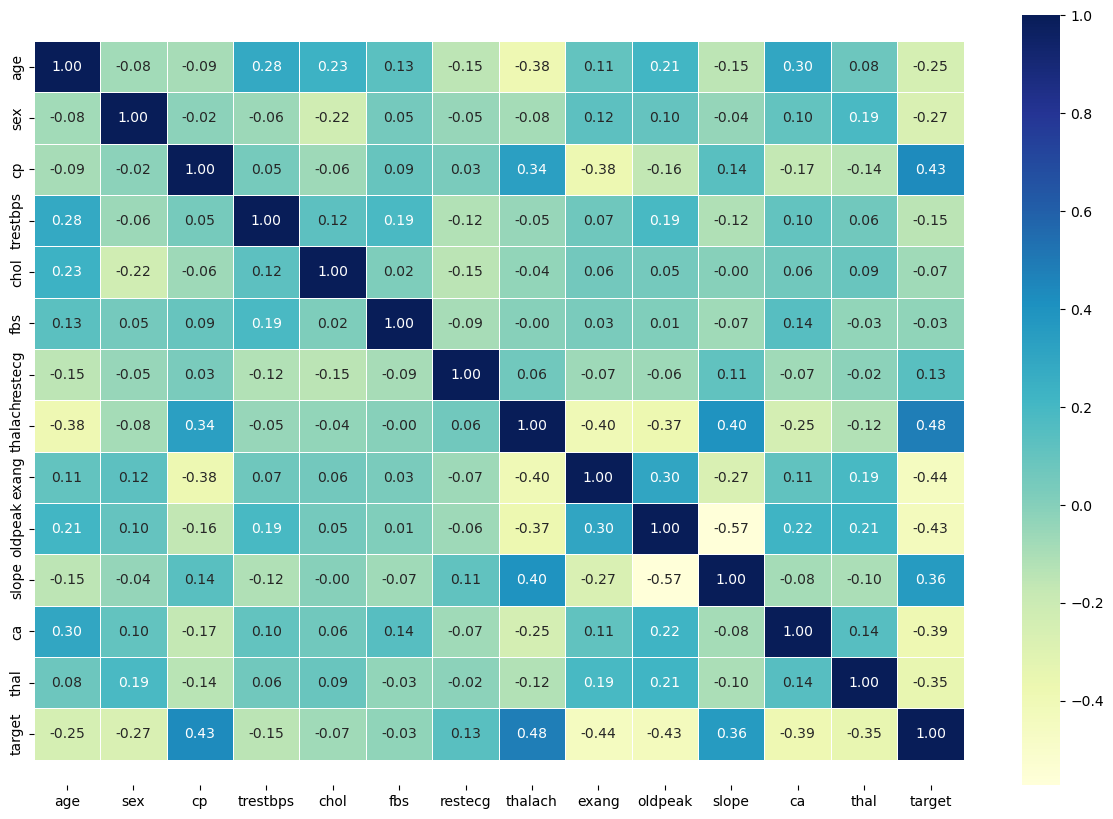

In [126]:
# Let's make our correlation matrix a little prettier
import seaborn as sns
corr_matrix = df2.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

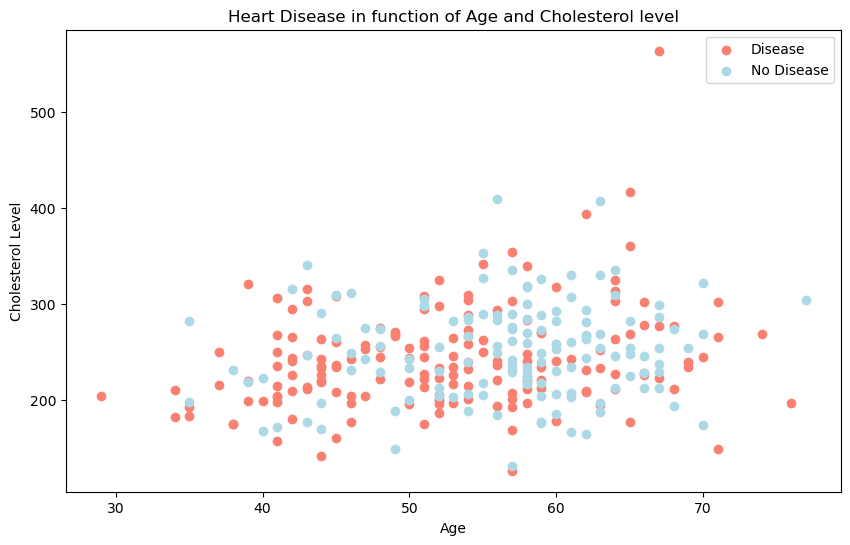

In [127]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.chol[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.chol[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Cholesterol level")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Cholesterol Level");

## PREPROCESSING

In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    int64  
 1   sex       296 non-null    int64  
 2   cp        296 non-null    int64  
 3   trestbps  296 non-null    int64  
 4   chol      296 non-null    int64  
 5   fbs       296 non-null    int64  
 6   restecg   296 non-null    int64  
 7   thalach   296 non-null    int64  
 8   exang     296 non-null    int64  
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    int64  
 11  ca        296 non-null    int64  
 12  thal      296 non-null    int64  
 13  target    296 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.7 KB


>Inference:Since each data is numerical and there is no missing value ,we don't need to preprocess it

## Check data if we need to scale it

In [129]:
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.165541,0.692568,0.952703,131.601351,246.962838,0.148649,0.523649,150.577703,0.327703,1.045946,1.402027,0.743243,2.320946,0.533784
std,9.016160,0.462212,1.027318,17.667260,52.101875,0.356344,0.520217,22.324131,0.470171,1.165195,0.613848,1.029211,0.600875,0.499702
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,242.500000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.250000,0.000000,1.000000,167.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


>Inference: There is not much variance between data points so we don't need to scale it

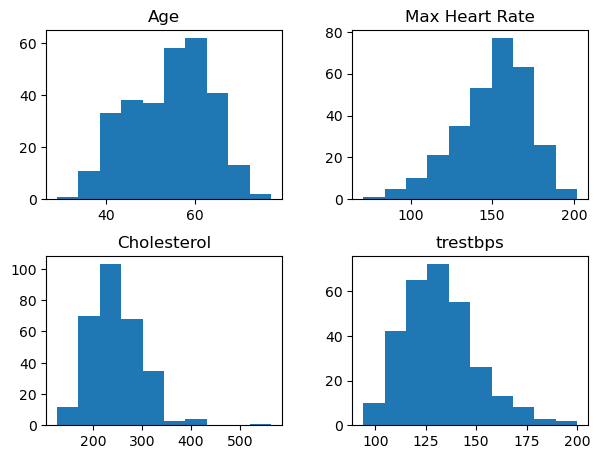

In [152]:
fig,ax=plt.subplots(nrows=2,
                   ncols=2)
fig.tight_layout(pad=2)

ax[0,0].hist(df2["age"])
ax[0,0].set_title("Age")

ax[0,1].hist(df2["thalach"])
ax[0,1].set_title("Max Heart Rate")

ax[1,0].hist(df2["chol"])
ax[1,0].set_title("Cholesterol")

ax[1,1].hist(df2["trestbps"])
ax[1,1].set_title("trestbps")

plt.show()


>Inference: Data is normally distributed

### Modeling

In [155]:
df2.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [156]:
len(df2)

296

In [165]:
np.random.seed(42)
## Splitting the data into features and labels
X=df2.drop("target",axis=1)
y=df2["target"]

##Splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.2,
                                              shuffle=True,
                                              random_state=42)

X_train.shape,X_test.shape

((236, 13), (60, 13))

In [166]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [167]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## Importing machine learning models suitable for structured data and binary classification

In [171]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [173]:
# Put models in a dictionary
models = {"Linear SVC":svm.SVC(),
          "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [174]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\Acer\Desktop\sample_project2\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Linear SVC': 0.7,
 'Logistic Regression': 0.8166666666666667,
 'KNN': 0.6166666666666667,
 'Random Forest': 0.7666666666666667}

## MODEL COMPARISON

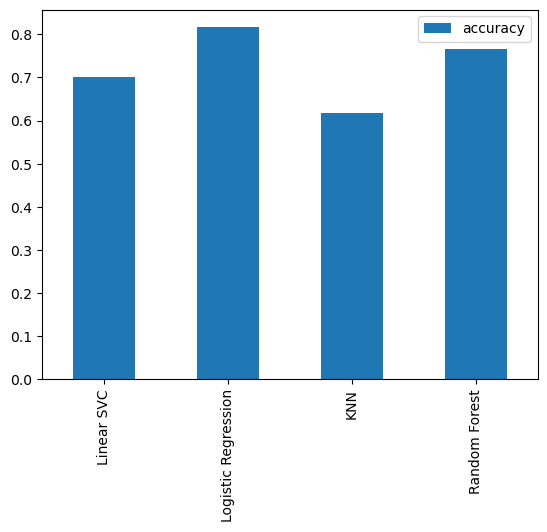

In [175]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### HYPERPARAMETER TUNING

In [179]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 61.67%


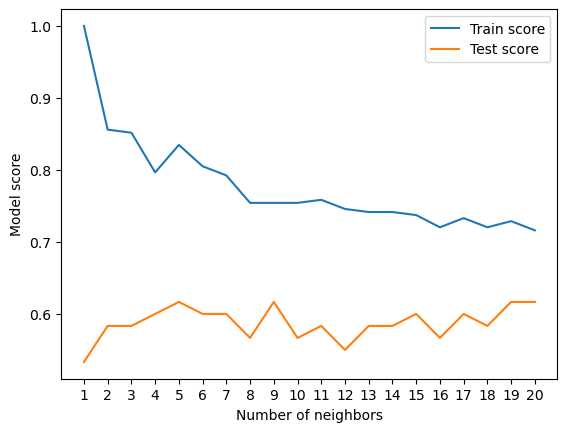

In [180]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Using RandomizedSearchCV

In [183]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [184]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [185]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [187]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [188]:
rs_log_reg.score(X_test,y_test)

0.8166666666666667

#### For random forest classifier

In [189]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [190]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [191]:
rs_rf.score(X_test,y_test)

0.75

### Evaluation of best model so far which is logistic regression

In [192]:
y_preds=rs_log_reg.predict(X_test)
y_preds

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

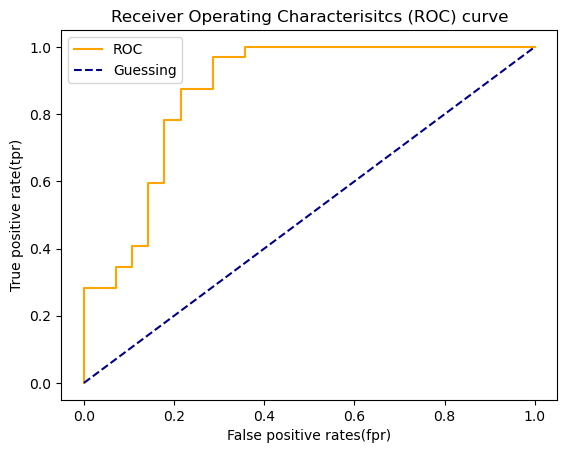

In [196]:
## Plotting roc curve 
from sklearn.metrics import roc_curve

y_probs_positive=rs_log_reg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)
def plot_roc_curve(fpr,tpr):
    '''
    PLots a ROC curve given the false positive rate(fpr)
    and true positive rate(tpr)
    '''
    
    #plot the roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    #plot the line with no predictive power(baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle='--',label="Guessing")
    
    #customize the plot
    plt.xlabel("False positive rates(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characterisitcs (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [197]:
from sklearn.metrics import ConfusionMatrixDisplay

In [200]:
from sklearn.metrics import confusion_matrix

y_preds = rs_log_reg.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[21,  7],
       [ 4, 28]], dtype=int64)

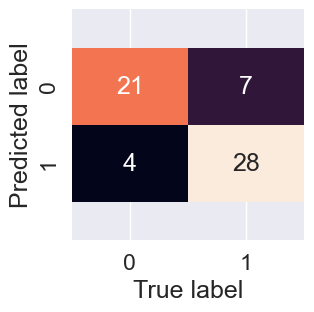

In [219]:


def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)


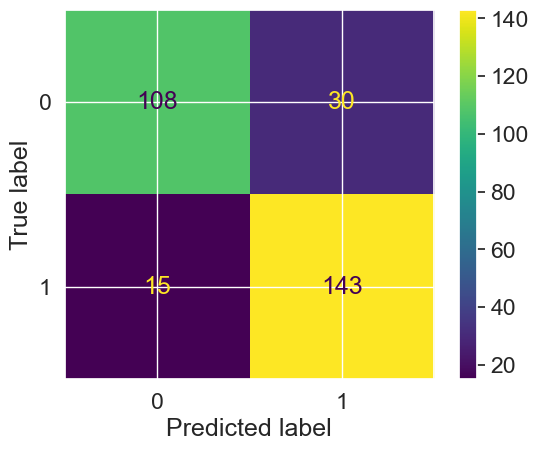

In [222]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=rs_log_reg, X=X, y=y);

In [224]:
## Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.80      0.88      0.84        32

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



### Inference: Through the evaluation the model logistic regression is found to be the best till now.

## Exporting the model

In [226]:
import pickle
pickle.dump(rs_log_reg,open("logistic_reg.pkl","wb"))

## Loading the model

In [227]:
loaded_model=pickle.load(open("logistic_reg.pkl","rb"))

In [228]:
loaded_model.score(X_test,y_test)

0.8166666666666667

In [246]:
loaded_model.predict(np.array([ 35. ,   0. ,   0. , 138. , 183. ,   0. ,   1. , 182. ,   0. ,
         1.4,   2. ,   0. ,   2. ]).reshape(1,-1))

C:\Users\Acer\Desktop\sample_project2\env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)